## K-Means

In [1]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
X = dataset.iloc[:,:].values
# X = dataset.values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화

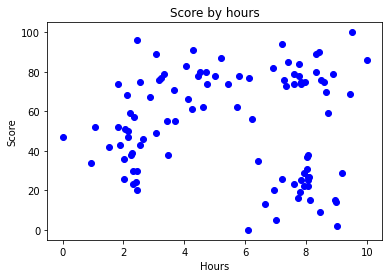

In [5]:
plt.scatter(X[:,0], X[:,1], color='blue')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### 데이터 시각화 (축 범위 통일)

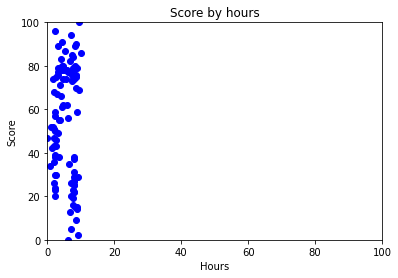

In [6]:
plt.scatter(X[:,0], X[:,1], color='blue')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.xlim(0, 100)
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

### feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (데이터 스케일링)

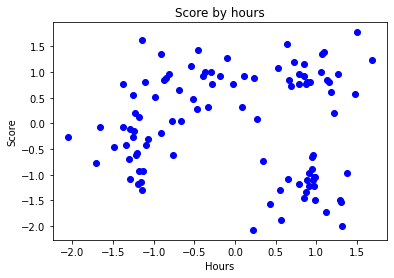

In [8]:
plt.scatter(X[:,0], X[:,1], color='blue')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### 최적의 K 값 찾기 (Elbow method)

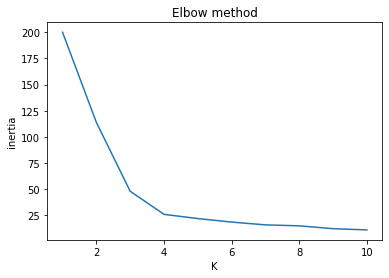

In [9]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심 까지의 거리의 제곱의 합
    
plt.plot(range(1,11), inertia_list)
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

### 위의 그래프에 의해 최적의 K=4

In [10]:
K = 4

In [11]:
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [12]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 (K-Means 결과)

In [14]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

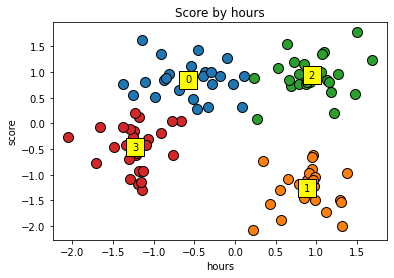

In [16]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복원)

In [17]:
X_org = sc.inverse_transform(X) # feature scaling 데이터를 원 데이터로 복원
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [18]:
centers_org = sc.inverse_transform(centers)
centers_org[:5]

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

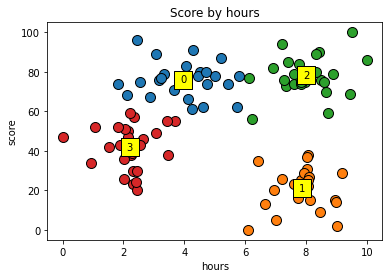

In [19]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()